In [61]:
%reset
%matplotlib inline

import cv2 
import common 
import numpy as np
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from skimage import img_as_float
import os
from pathlib import Path
import random

def imshow_all(*images, titles=None, axis=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    if len(images)>1:
        for ax, img, label in zip(axes.ravel(), images, titles):
            ax.imshow(img, vmin=vmin, vmax=vmax)
            if axis is not None:
                ax.axis('off')
            ax.set_title(label)
    else:
        plt.imshow(images[0])
def cb(*images, cvtColor=None):
    for img in images:
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def cg(*images, cvtColor=None):
    for img in images:
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
def cbg(*images, cvtColor=None):
    for img in images:
        return cb(cg(cb(img)))
def plot1(image, title='', axis=None):
    plt.imshow(image)
    plt.title(title)
    if axis is not None:
        plt.axis('off')


1
R
1
R
1
R
1
R
5
P
7
P


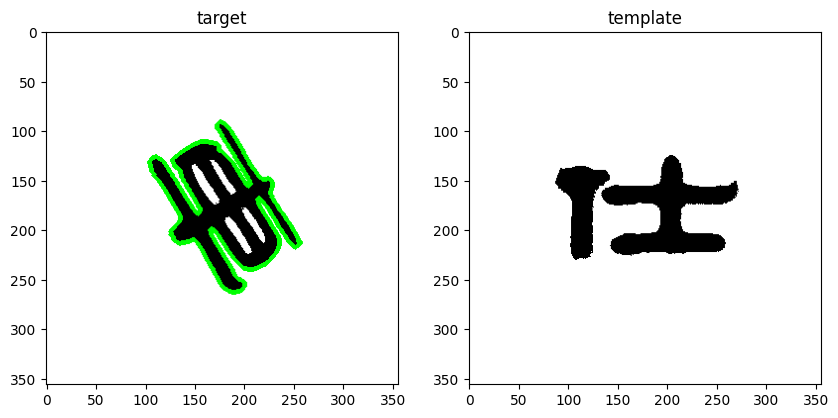

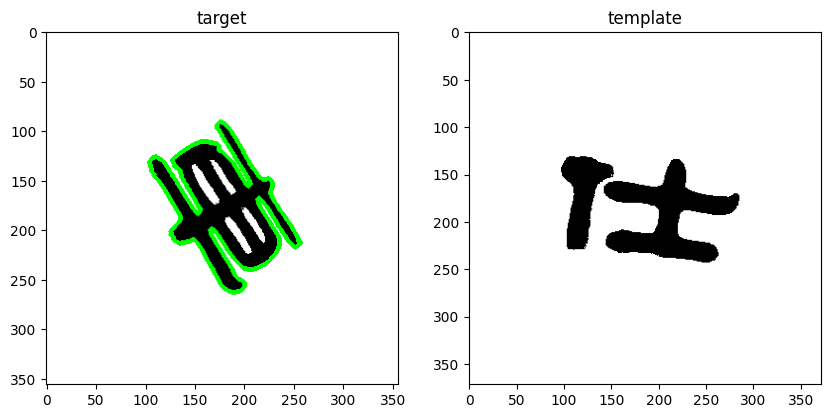

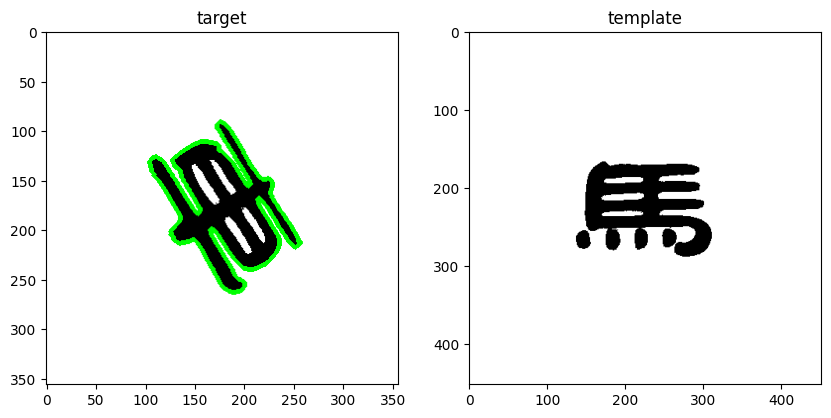

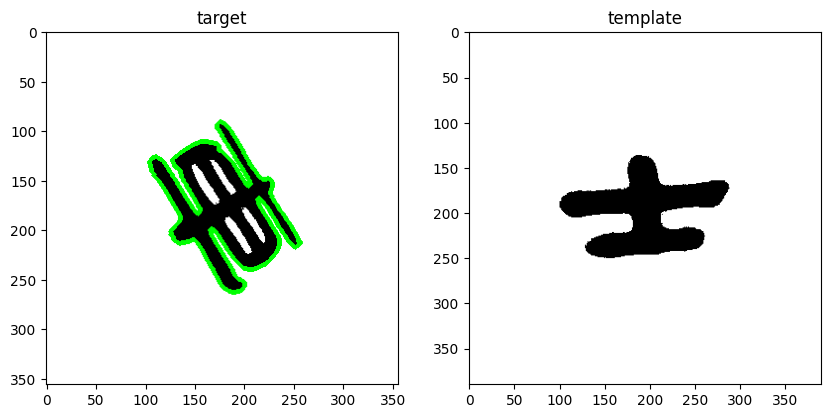

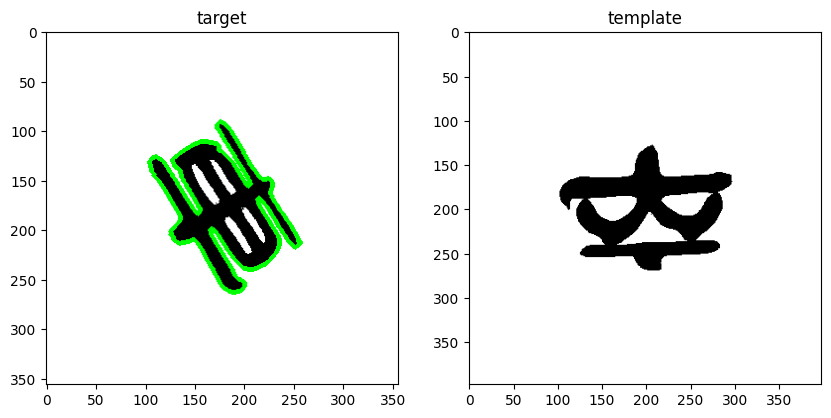

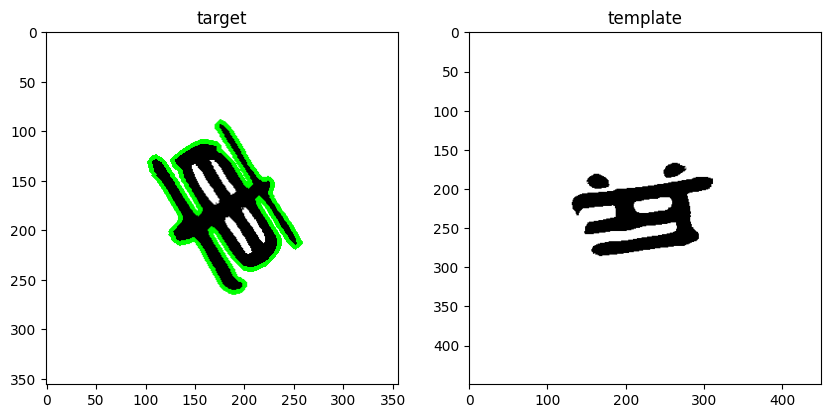

In [79]:
char_ref = {1:'R',2:'R',3:'K',4:'H',5:'P',6:'C',7:'P',8:'K',9:'C',10:'A',11:'H',12:'E',13:'A',14:'E'}


targets_directory = 'imgs_p/p/comp_outputs/p2_0'
trg = []
for t5 in os.listdir(targets_directory):
    f = os.path.join(targets_directory, t5)
    if os.path.isfile(f):
        trg.append(f)

read0 = trg[0]
#read0 = random.choice(trg)

target0 = cv2.imread(read0)

templates_directory = 'imgs_p/ch_db/a'
tmpl = []
for filename in os.listdir(templates_directory):
    f = os.path.join(templates_directory, filename)
    if os.path.isfile(f):
        tmpl.append(f)

for templates in tmpl:

    #target0 = cv2.imread(targets)
    target = target0.copy()
    target_erased = target0.copy()
    target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

    template = cv2.imread(templates,0)  ##
        

    # Threshold both images first before using cv2.findContours
    ret, thresh1 = cv2.threshold(template, 127, 255, 0)
    ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)
    #thresh1 = cv2.GaussianBlur(thresh1,(5,5),0)
    #thresh2 = cv2.GaussianBlur(thresh2,(5,5),0)
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    #print(cv2.contourArea(contours[0]),cv2.contourArea(contours2[0]))
    # We need to sort the contours by area so that we can remove the largest
    # contour which is the image outline
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    # We extract the second largest contour which will be our template contour
    template_contour = contours[1]
    # Extract contours from second target image
    contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    for c in contours[1:]:
        # Iterate through each contour in the target image and 
        # use cv2.matchShapes to compare contour shapes
        match = cv2.matchShapes(template_contour, c, 2, 0.0)

        #print(cv2.contourArea(c))
        
        # If the match value is less than 0.15 we
        if (match < 0.15 and cv2.contourArea(c)>10000):
            closest_contour = c  
            cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)
            cv2.drawContours(target_erased, [closest_contour], -1, (255,255,255), cv2.FILLED)
        else:
            closest_contour = [] 
                        
        #cv2.drawContours(target, [closest_contour], -1, (0,255,0), cv2.FILLED)
        #print(closest_contour)
        #cv2.drawContours(target, [tot_contours[0]], -1, (0,255,0), 3)
        #plt.imshow(target)
        #imshow_all(target, cb(template), target_erased, titles = ['target','template','erased'])
        # percentage of original character erased:
    tb = np.sum(thresh2 == 0)
    tba = np.sum(cg(target_erased) == 0)
    val = (1 - tba/tb)*100

    if val > 0.3:
        p = Path(templates).stem[0]
        print(Path(templates).stem[0]) 
        print(char_ref[int(p)])
        
        #imshow_all(target, cb(template), target_erased, titles = ['target','template','erased'],axis='off')
        imshow_all(target, cb(template), titles = ['target','template'])

